# Telecommunication Customer Churn Prediction

## Exploratory Data Analysis

The Background Introduction  
he data set includes information about:
Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online * security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method,

paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

Churn - dependent feature ('Yes' denotes customers left, 'No' denotes customer stay here)


Prediction Used Model:
  *  

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
1 binary features: gender  
7 non-binary categorical features: cnt_children, name_income_type,name_education_type, name_family_status, name_housing_type, occupation_type, cnt_fam_members  
3 continuous features: amt_income_type, days_birth, days_employed  
1 constant feature: flag_mobil  
1 possible drop feature: CustomerID
1 target variable: Churn

In [51]:
# import from google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground


In [52]:
#Code to verify the package installation
try:
  import execdata
  print('package is installed.')
except:
  print('Package not found')

package is installed.


In [53]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [54]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import execdata as exe
from tabulate import tabulate
import pickle
import time
from rich.progress import track

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # for showing percentage in it
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Imbalanced Dataset Learning
from imblearn.combine import SMOTEENN
from collections import Counter

#Scikit-Learn Fundamental Packages
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
# from sklearn.metrics import roc_auc_score,roc_curve, plot_roc_curve
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [55]:
# for i in track(range(15), description="[green]Loading..."):
#   time.sleep(1)

In [56]:
root_dir = '/content/drive/MyDrive'
work_dir = '/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction'
data_path =f'{work_dir}/data'
result_dir = f'{work_dir}/result'

In [57]:
import os
if not os.path.exists(data_path):
  os.mkdir(data_path)

In [58]:
import os
if not os.path.exists(result_dir):
  os.mkdir(result_dir)

In [59]:
%cd '{work_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction


In [61]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')
# Read the dataset - switch to second link if first one not work, OP mean On Progressing
data_dir = 'https://raw.githubusercontent.com/bdfd/Section6.Project02-Telco_Customer_Churning_Prediction/main/1.0%20dataset/'
dataset_url_1 = 'S602_Preprocessed%20Dataset.csv'
dataset_url_2 = 'S602_Preprocessed%20Dataset.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_url_1), encoding = 'utf-8')
df2 = pd.read_csv(os.path.join(data_dir,dataset_url_2), encoding = 'utf-8')
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,0,DSL,No,Yes,No,No,No,No,Monthly,Yes,Mailed Cheque,29.85,29.85,No
1,Male,0,No,No,34,Yes,1,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Cheque,56.95,1889.50,No
2,Male,0,No,No,2,Yes,1,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed Cheque,53.85,108.15,Yes
3,Male,0,No,No,45,No,0,DSL,Yes,No,Yes,Yes,No,No,One year,No,E-Transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,1,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Mailed Cheque,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,2,Fiber optic,No,No,Yes,No,Yes,Yes,Monthly,Yes,Mailed Cheque,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,2,Fiber optic,No,Yes,No,No,Yes,No,Monthly,Yes,Credit card,89.10,1949.40,No
7,Female,0,No,No,10,No,0,DSL,Yes,No,No,No,No,No,Monthly,No,Mailed Cheque,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,2,Fiber optic,No,No,Yes,Yes,Yes,Yes,Monthly,Yes,Mailed Cheque,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,1,DSL,Yes,Yes,No,No,No,No,One year,No,E-Transfer,56.15,3487.95,No


In [62]:
target_feature = 'Churn'

In [63]:
print(f'the dataset_1 size is {df.shape} and target feature is {target_feature}')

the dataset_1 size is (7043, 20) and target feature is Churn


In [64]:
# Check column name and categories
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [65]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          3
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [66]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [67]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [68]:
# Varify the data type match with corresponding columns types
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines         int64
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [69]:
df.describe()

,SeniorCitizen,tenure,MultipleLines,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.325004,64.761692,2279.734304
std,0.368612,24.559481,0.642730,30.090047,2266.794470
min,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,1.000000,35.500000,398.550000
50%,0.000000,29.000000,1.000000,70.350000,1394.550000
75%,0.000000,55.000000,2.000000,89.850000,3786.600000
max,1.000000,72.000000,2.000000,118.750000,8684.800000


Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


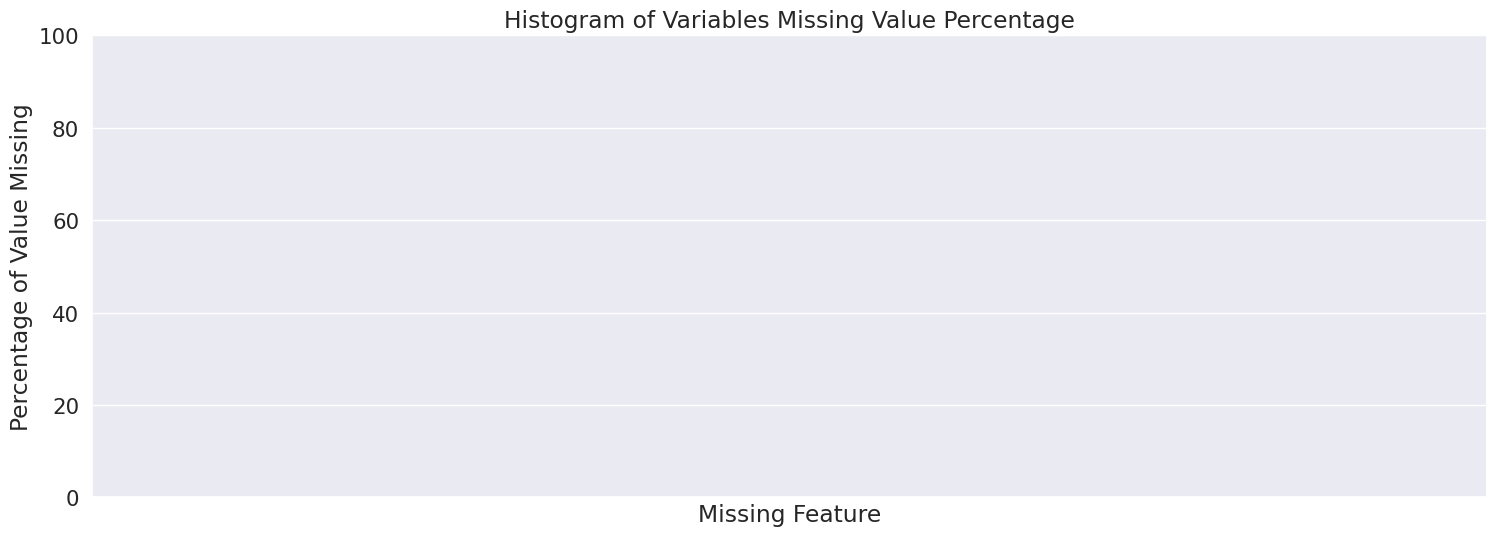

,index,Miss_Values,Miss_Rate,Available_Value


In [70]:
exe.analysis_graph.missing_value_analysis(df)

In [71]:
num_features = [feature for feature in df.columns if df[feature].dtypes!='O']
num_features

['SeniorCitizen', 'tenure', 'MultipleLines', 'MonthlyCharges', 'TotalCharges']

In [72]:
cat_features = [feature for feature in df.columns if df[feature].dtypes=='O']
cat_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [73]:
numeric_features = exe.data_preprocessing.column_identify(df,num_features)
numeric_features

{'SeniorCitizen': 2,
 'tenure': 73,
 'MultipleLines': 3,
 'MonthlyCharges': 1585,
 'TotalCharges': 6531}

In [74]:
category_features = exe.data_preprocessing.column_identify(df,cat_features)
category_features

{'gender': 2,
 'Partner': 2,
 'Dependents': 2,
 'PhoneService': 2,
 'InternetService': 3,
 'OnlineSecurity': 2,
 'OnlineBackup': 2,
 'DeviceProtection': 2,
 'TechSupport': 2,
 'StreamingTV': 2,
 'StreamingMovies': 2,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 3,
 'Churn': 2}

In [24]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [75]:
new_cat_features = exe.data_preprocessing.sort_categorical_feature(cat_features)
new_cat_features

['Churn',
 'Contract',
 'Dependents',
 'DeviceProtection',
 'InternetService',
 'OnlineBackup',
 'OnlineSecurity',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod',
 'PhoneService',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'gender']

In [76]:
feature_le = exe.data_preprocessing.fit_label_encode(df, new_cat_features)
feature_le[0].classes_

array(['No', 'Yes'], dtype=object)

In [77]:
transformed_cat_df = exe.data_preprocessing.transform_label_encode(df, new_cat_features, feature_le)

In [78]:
transformed_cat_df

,Churn,Contract,Dependents,DeviceProtection,InternetService,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,PhoneService,StreamingMovies,StreamingTV,TechSupport,gender
0,0,0,0,0,0,1,0,1,1,2,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,2,1,0,0,0,1
2,1,0,0,0,0,1,1,1,0,2,1,0,0,0,1
3,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1
4,1,0,0,0,1,0,0,1,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,0,0,1,1,1,2,1,1,1,1,1
7039,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0
7040,0,0,1,0,0,0,1,1,1,2,0,0,0,0,0
7041,1,0,0,0,1,0,0,1,1,2,1,0,0,0,1


In [79]:
df.drop('TotalCharges',axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,1,0,1,0,1,0,0,0,1,0,2,56.95,0
2,1,0,0,0,2,1,1,0,1,1,0,0,0,0,0,1,2,53.85,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,1,42.30,0
4,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,1,0,1,1,1,1,1,1,2,84.80,0
7039,0,0,1,1,72,1,2,1,0,1,1,0,1,1,1,1,0,103.20,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,2,74.40,1


In [80]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 66, (0.9%)



0    5174
1    1869
Name: Churn, dtype: int64


<Axes: >

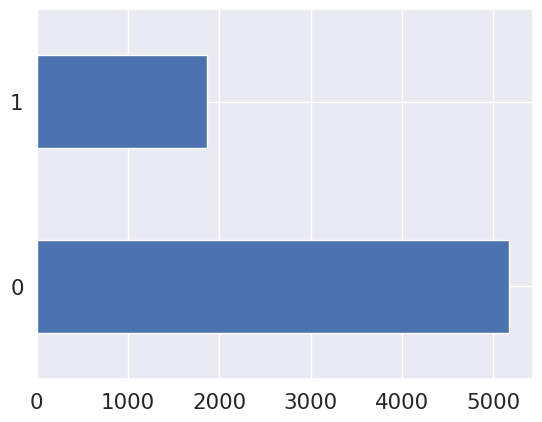

In [81]:
# plotting with target feature with count graph-1
print(df[target_feature].value_counts())
df[target_feature].value_counts().plot(kind='barh')

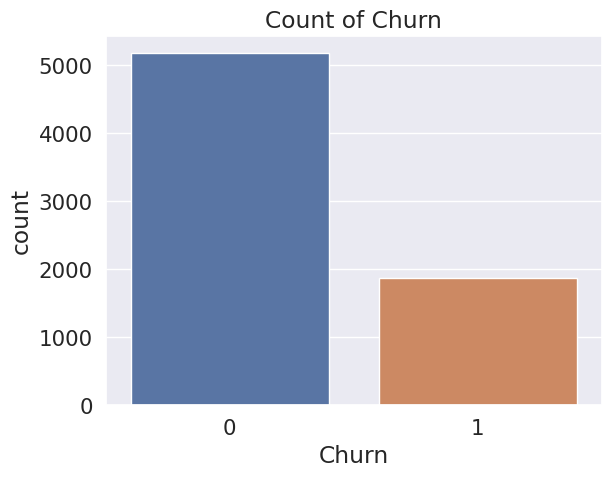

In [82]:
# plotting with target feature with count graph-2
sns.countplot(data=df, x=target_feature)
plt.title('Count of Churn')
plt.show()

In [84]:
print(df[target_feature].value_counts().to_frame())

   Churn
0   5174
1   1869


In [85]:
majornity_target_value = 0
target_value_percentage = exe.data_preprocessing.majority_target_variable(
    df, target_feature, majornity_target_value)

The Dataframe Value Count is: 7043 , and includes 2 values
The Majornity Target Value Count is: 5174
Majornity Target Value Percentage: 73.46%
This is a imbalance dataset.


<Figure size 640x480 with 0 Axes>

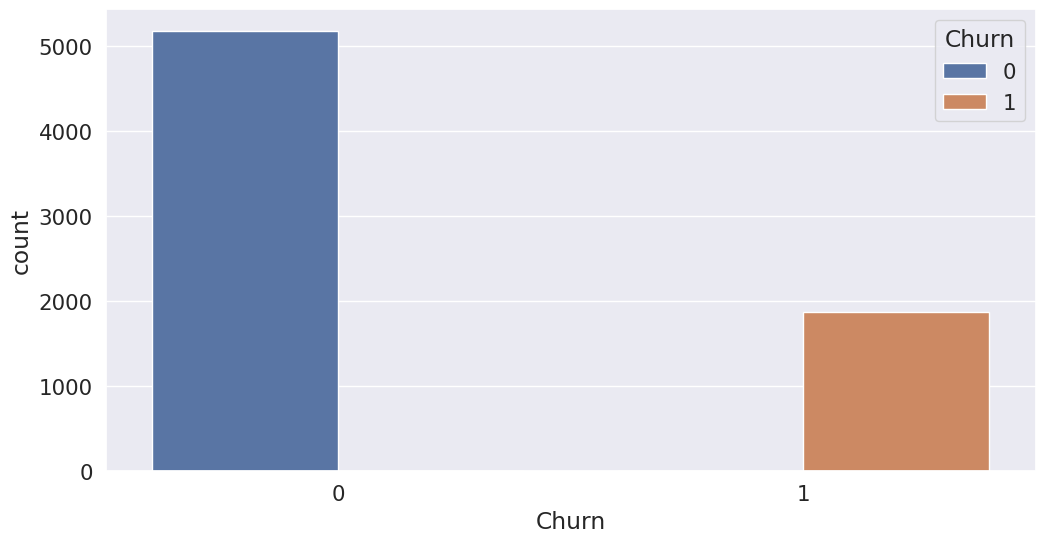

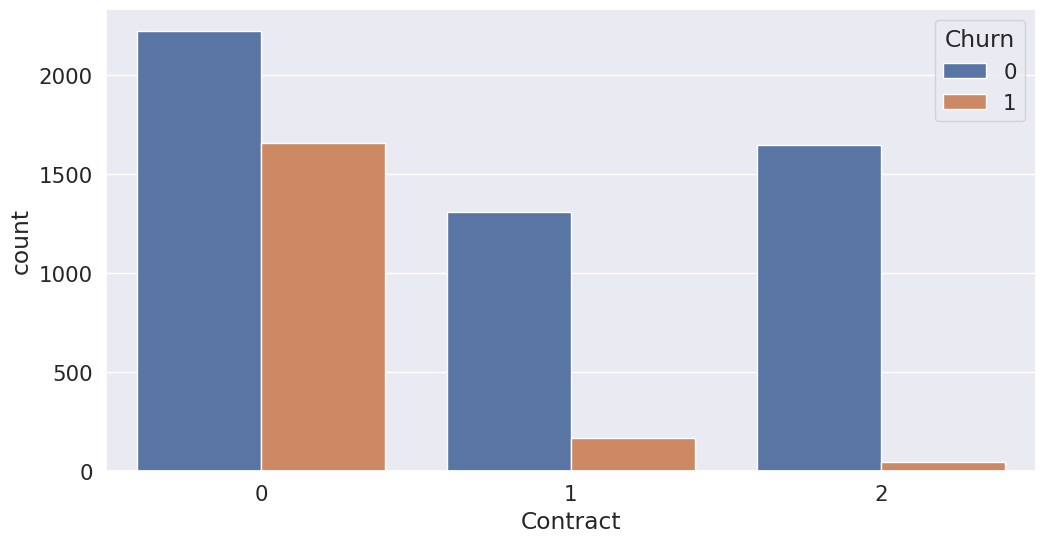

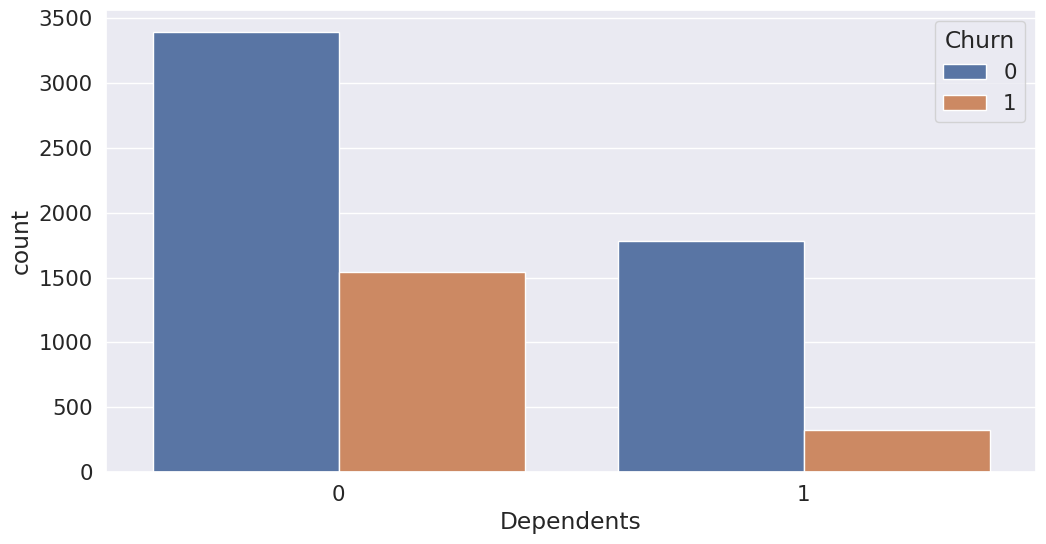

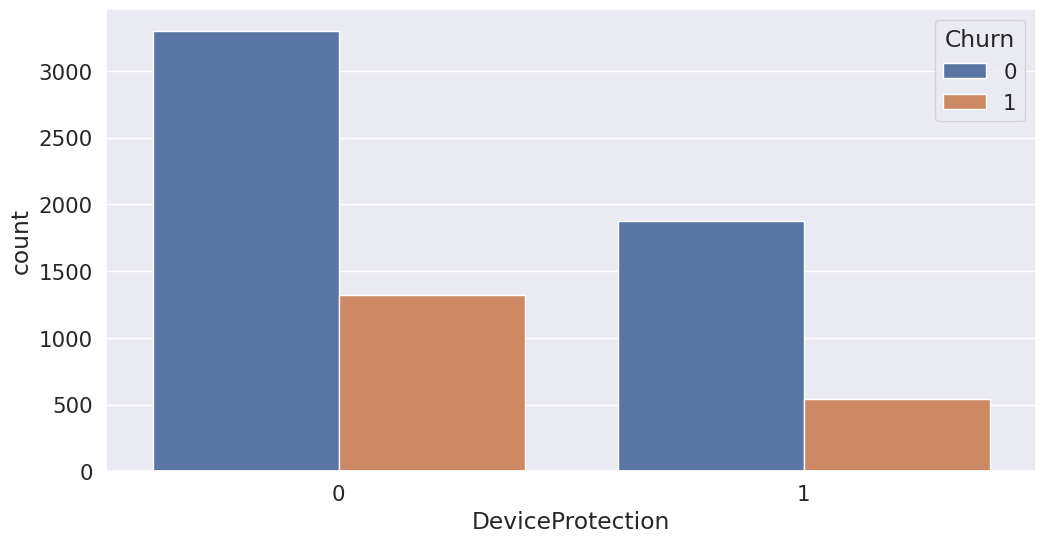

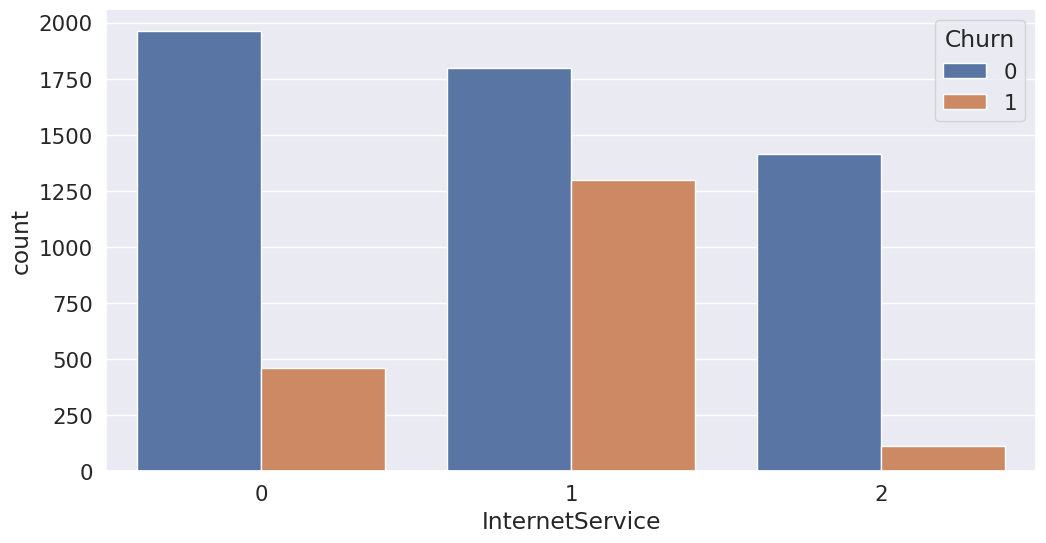

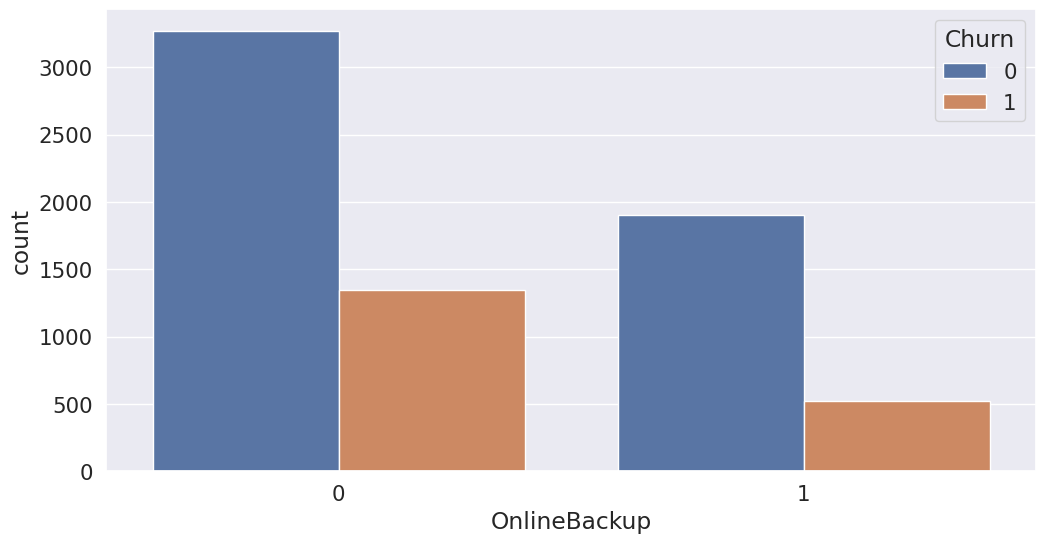

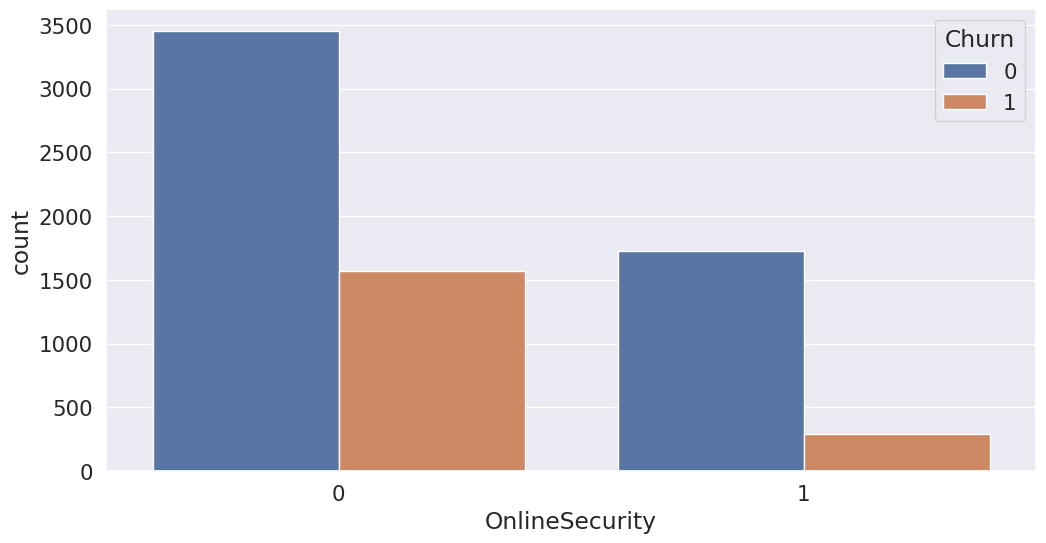

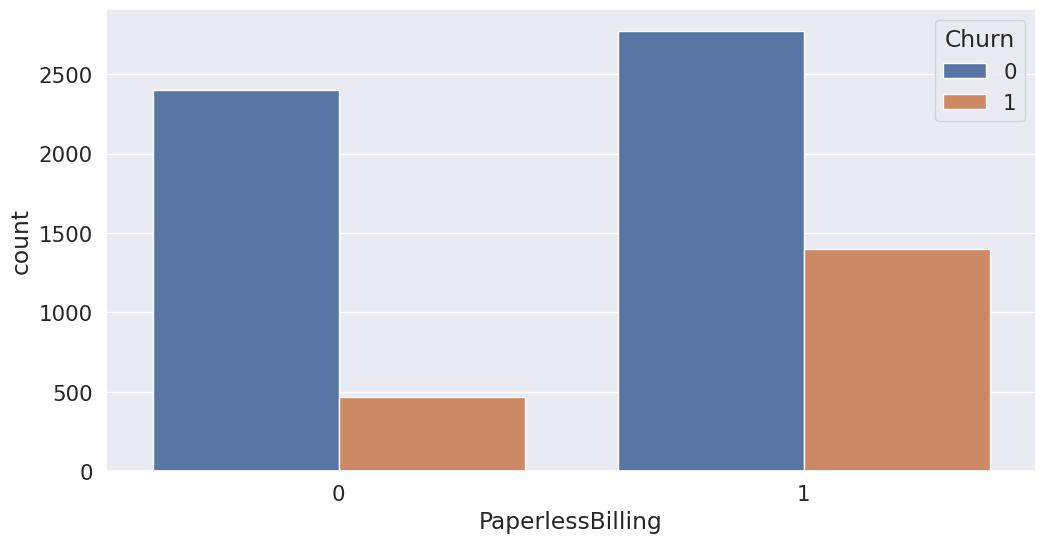

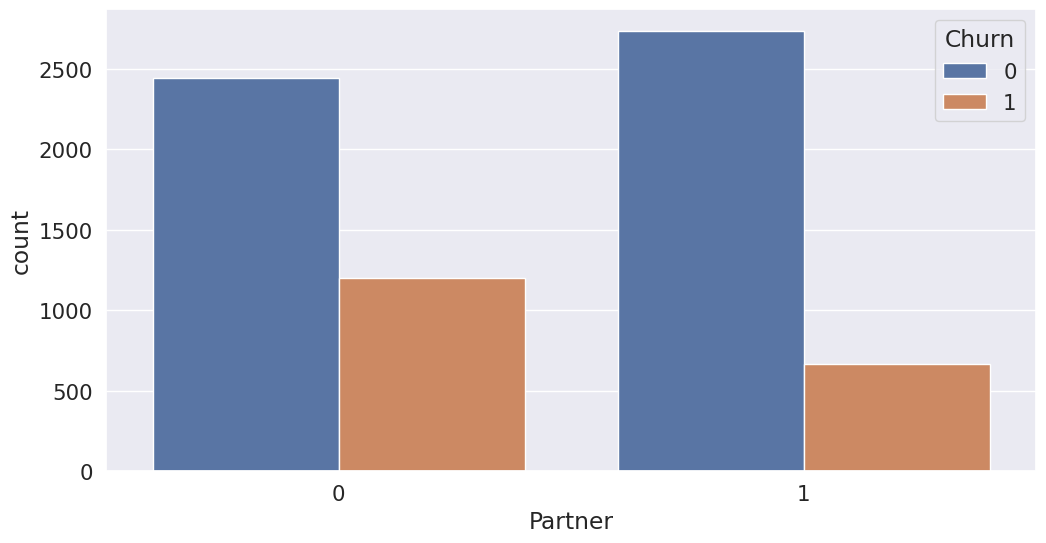

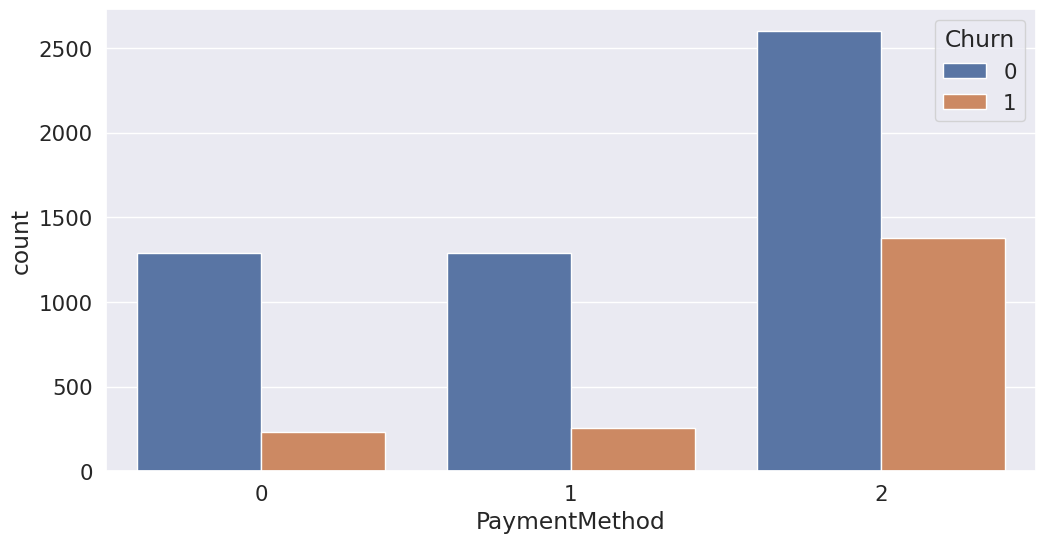

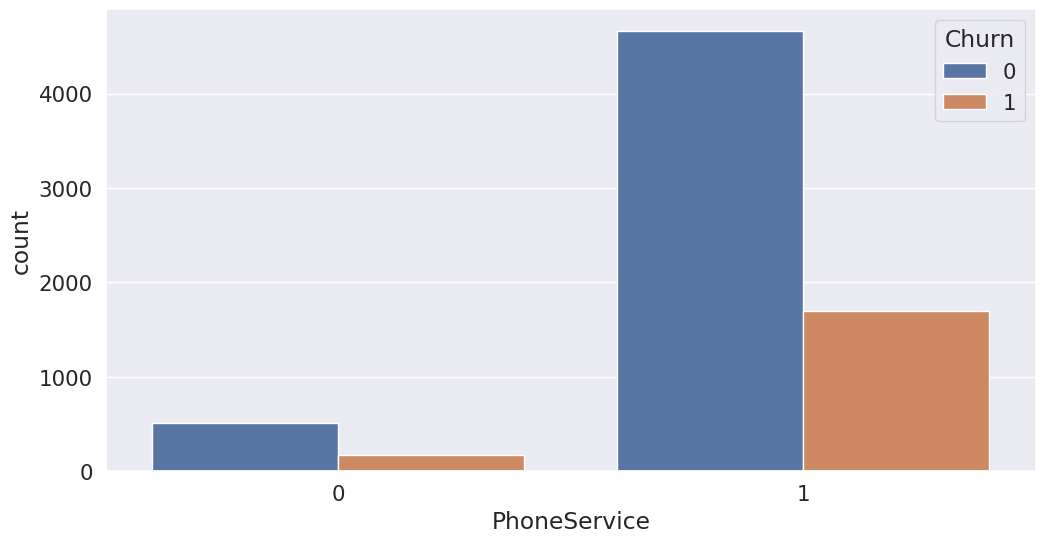

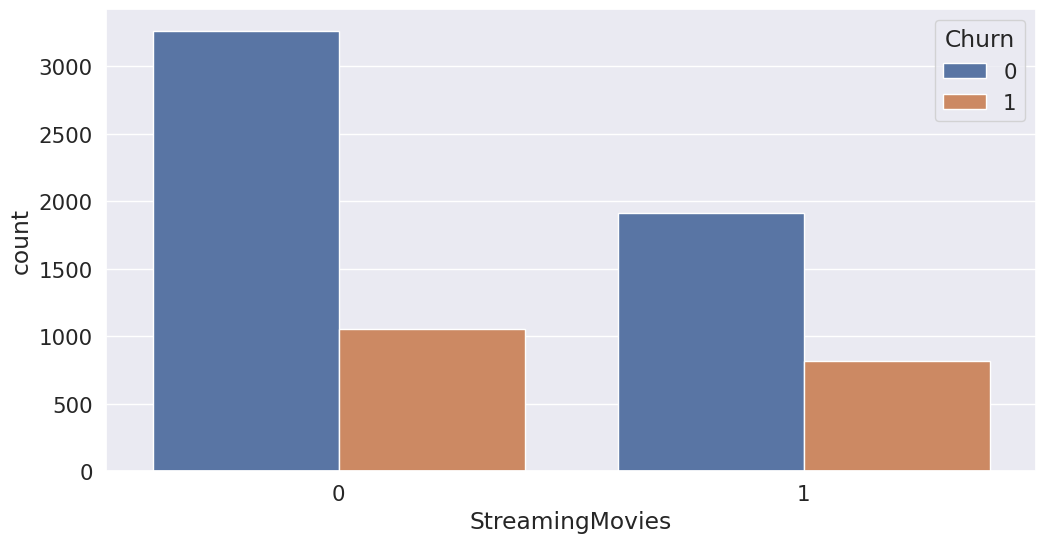

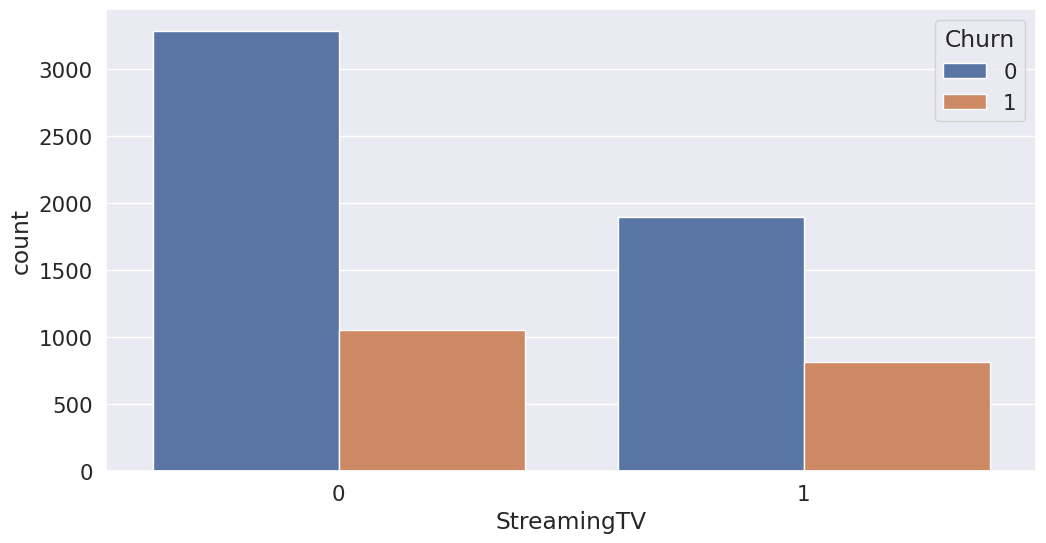

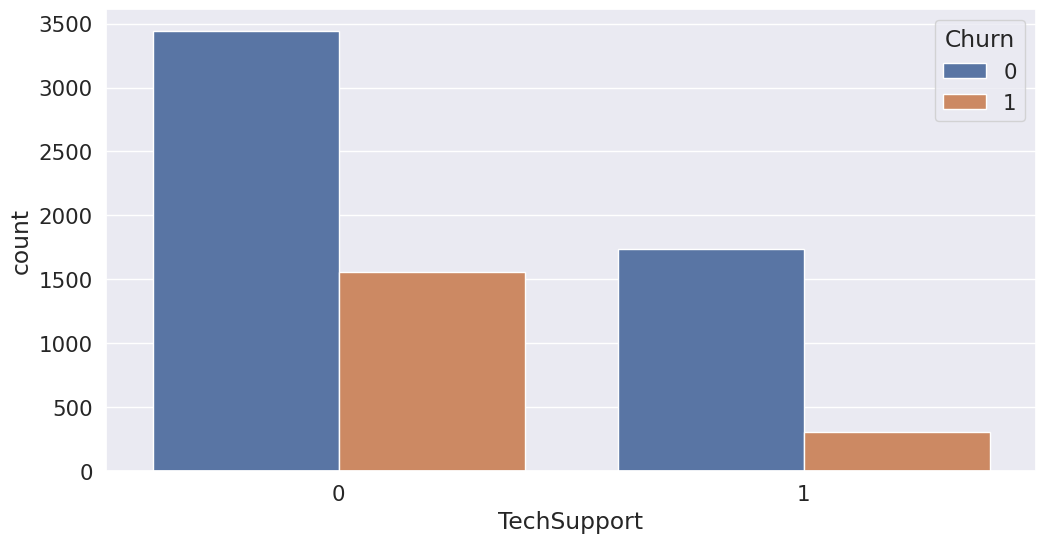

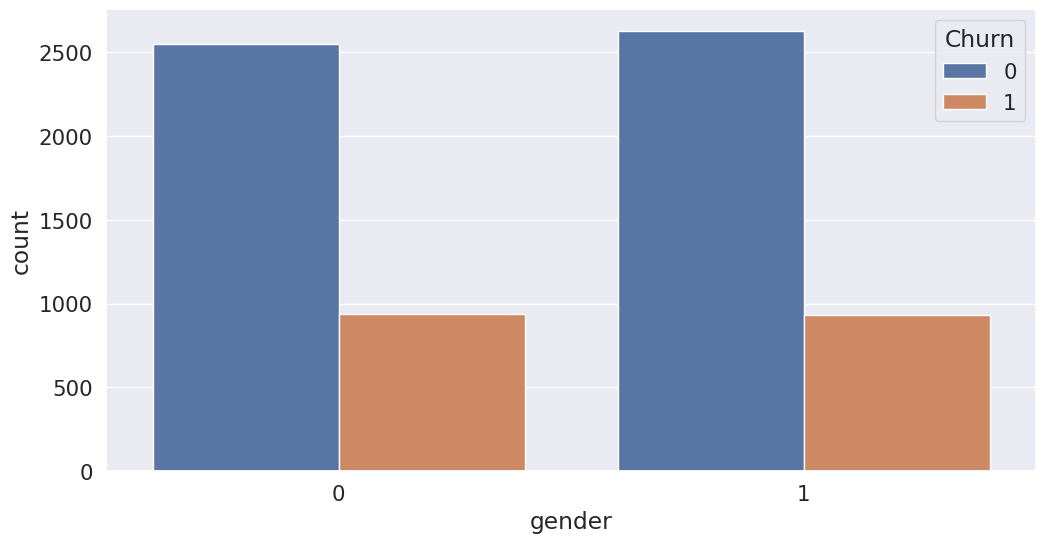

In [86]:
for i, feature in enumerate(cat_features):
  if(len(df[feature].unique()))<5:
    plt.figure(i)
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=feature, hue=target_feature)
plt.show()

<Axes: >

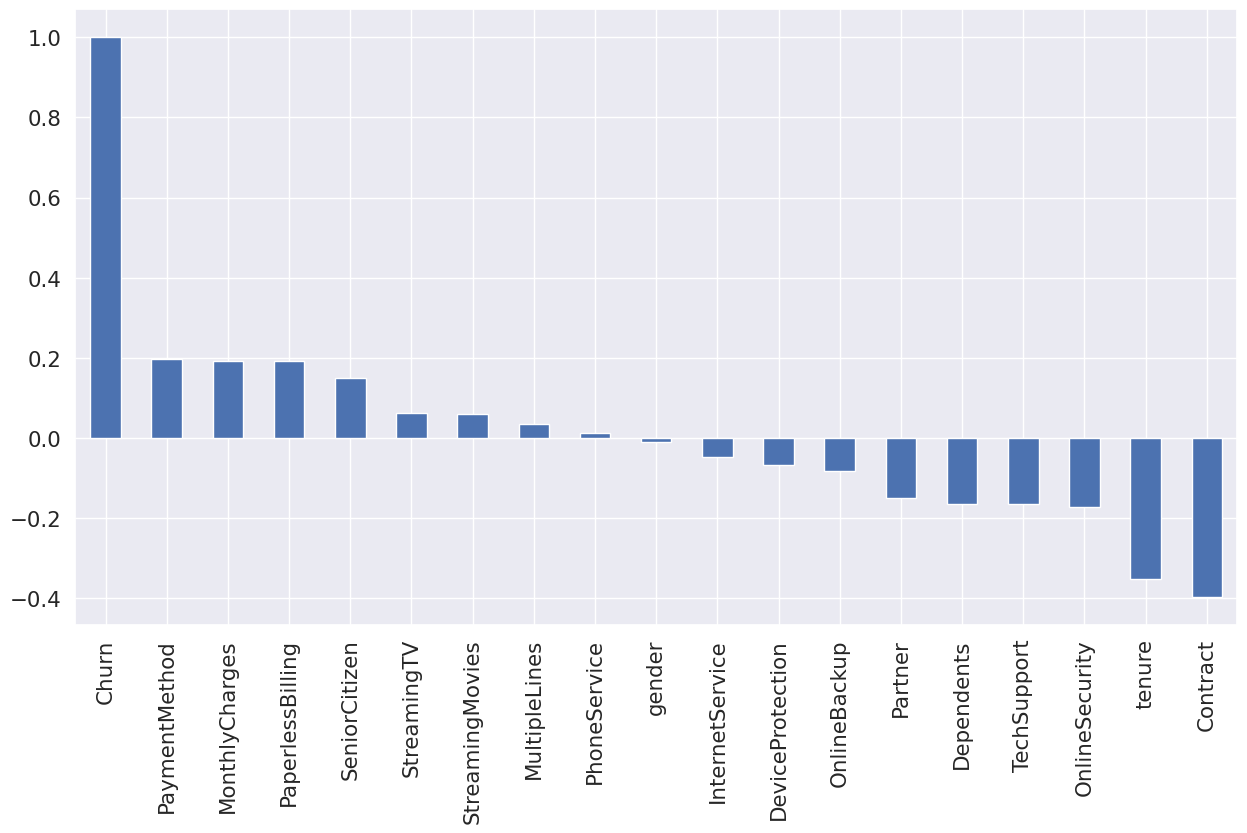

In [87]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()[target_feature].sort_values(ascending = False).plot(kind='bar')

<Axes: >

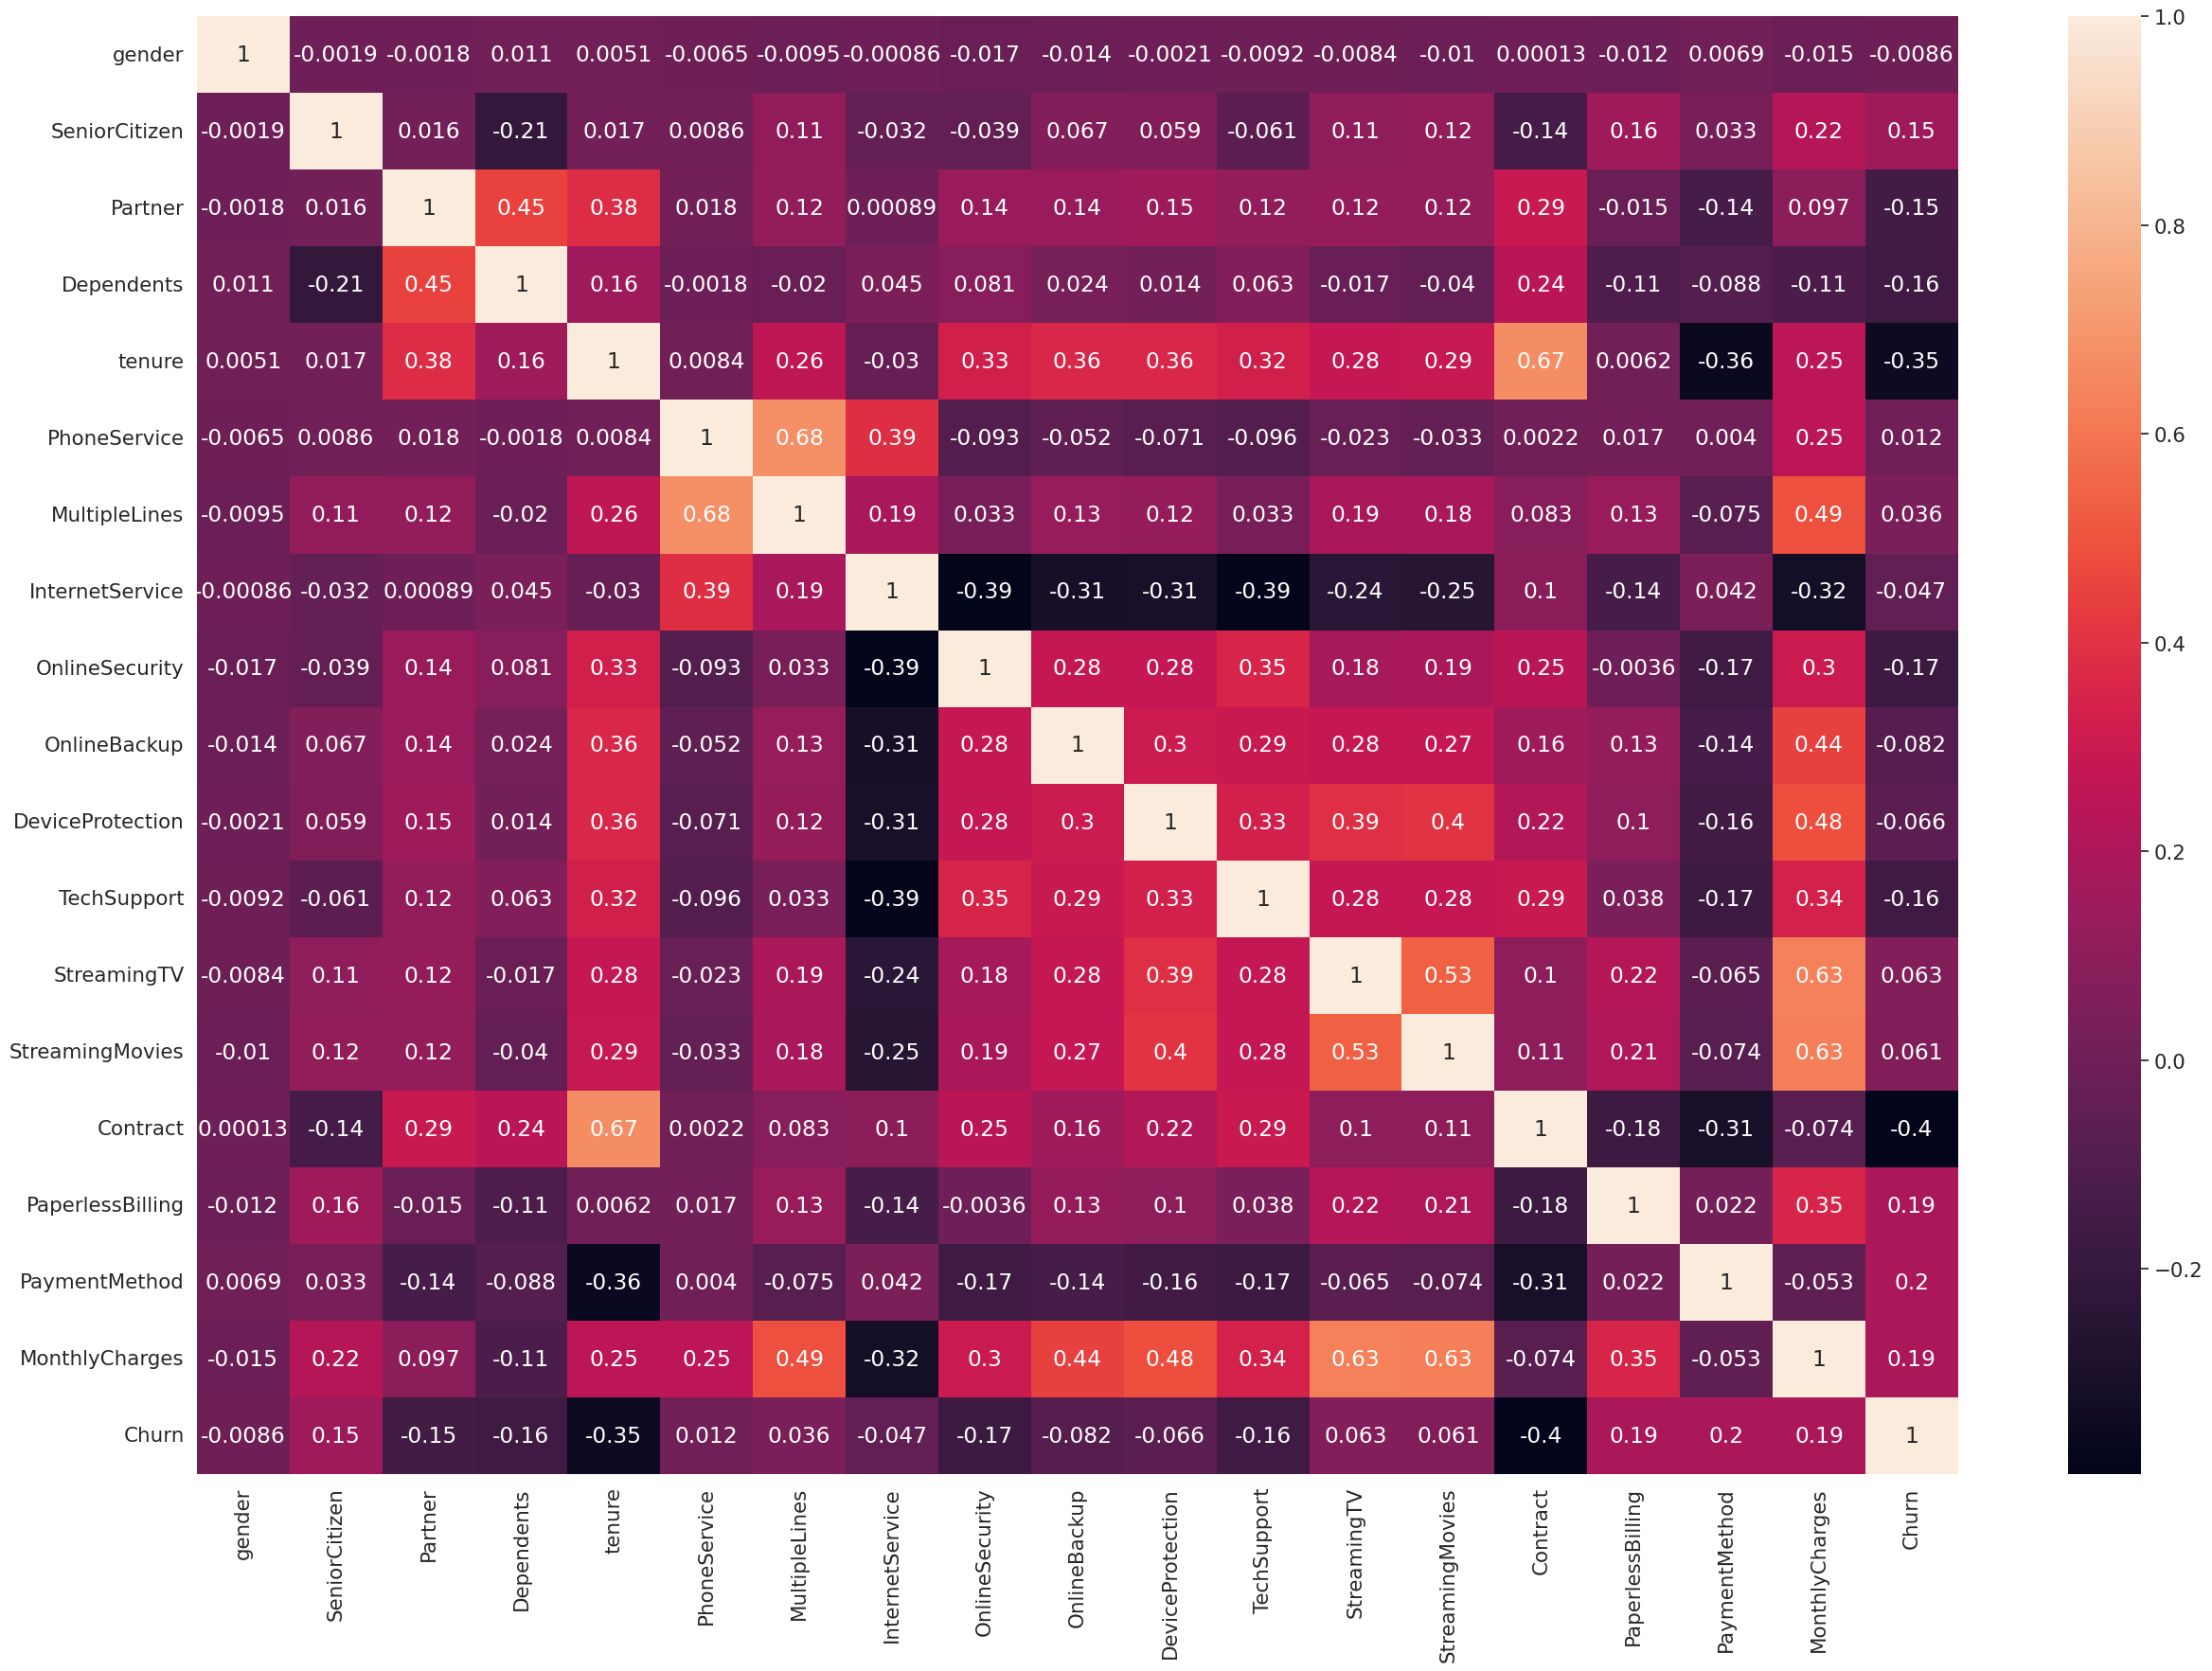

In [88]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)

## Data Cleansing

In [89]:
# splitting dataset into dependent and independent feature
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,1,0,1,0,1,0,0,0,1,0,2,56.95,0
2,1,0,0,0,2,1,1,0,1,1,0,0,0,0,0,1,2,53.85,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,1,42.30,0
4,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,1,0,1,1,1,1,1,1,2,84.80,0
7039,0,0,1,1,72,1,2,1,0,1,1,0,1,1,1,1,0,103.20,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,2,74.40,1


### Feature Selection:
Selects only 10 feature which has higher correlation

In [90]:
top10_cat_features = exe.analysis_graph.top_correlation(df, target_feature)


Top 10 Feature Correlations (sorted by absolute values):
| Feature          |   Abs Cor |
|------------------|-----------|
| Contract         |     -0.4  |
| tenure           |     -0.35 |
| PaymentMethod    |      0.2  |
| PaperlessBilling |      0.19 |
| MonthlyCharges   |      0.19 |
| OnlineSecurity   |     -0.17 |
| Dependents       |     -0.16 |
| TechSupport      |     -0.16 |
| SeniorCitizen    |      0.15 |
| Partner          |     -0.15 |


In [91]:
top10_cat_features

['Contract',
 'tenure',
 'PaymentMethod',
 'PaperlessBilling',
 'MonthlyCharges',
 'OnlineSecurity',
 'Dependents',
 'TechSupport',
 'SeniorCitizen',
 'Partner',
 'Churn']

In [92]:
df = exe.data_preprocessing.column_not_drop(df, top10_cat_features)
df

The dropped column list are: ['DeviceProtection', 'InternetService', 'MultipleLines', 'OnlineBackup', 'PhoneService', 'StreamingMovies', 'StreamingTV', 'gender']


,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,0,0,1,2,29.85,0
1,0,0,0,34,1,0,1,0,2,56.95,0
2,0,0,0,2,1,0,0,1,2,53.85,1
3,0,0,0,45,1,1,1,0,1,42.30,0
4,0,0,0,2,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,2,84.80,0
7039,0,1,1,72,0,0,1,1,0,103.20,0
7040,0,1,1,11,1,0,0,1,2,29.60,0
7041,1,1,0,4,0,0,0,1,2,74.40,1


In [42]:
%cd '{result_dir}'
!pwd
df.to_csv('S602_Munged_Data.csv', index=False)

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction/result
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction/result


## Data Train Prepartion

In [43]:
print(target_feature)

Churn


In [48]:
X_train, X_test, y_train, y_test = exe.data_preprocessing.sep_split(df,target_feature)

In [49]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
4933,0,0,1,4,1,0,0,1,2,57.20
6489,0,0,0,1,0,0,0,1,2,18.85
3369,1,0,0,11,1,0,0,1,2,55.60
4705,0,0,0,6,1,0,0,1,2,78.95
3332,0,0,0,1,0,0,0,0,2,46.30
...,...,...,...,...,...,...,...,...,...,...
5242,0,0,0,20,0,0,0,1,2,88.70
51,0,0,0,15,1,0,0,1,0,99.10
631,0,1,0,46,1,0,0,0,1,55.00
828,0,1,1,60,0,0,1,0,2,90.95


In [50]:
X_train.to_csv('S602_X_train.csv')
y_train.to_csv('S602_y_train.csv')
X_test.to_csv('S602_X_test.csv')
y_test.to_csv('S602_y_test.csv')

In [94]:
X_sample = pd.read_csv('https://raw.githubusercontent.com/bdfd/Section6.Project02-Telco_Customer_Churning_Prediction/main/1.0%20dataset/S602_X_train.csv', encoding = 'utf-8')
X_sample

,Unnamed: 0,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,4933,0,0,1,4,1,0,0,1,2,57.20
1,6489,0,0,0,1,0,0,0,1,2,18.85
2,3369,1,0,0,11,1,0,0,1,2,55.60
3,4705,0,0,0,6,1,0,0,1,2,78.95
4,3332,0,0,0,1,0,0,0,0,2,46.30
...,...,...,...,...,...,...,...,...,...,...,...
5629,5242,0,0,0,20,0,0,0,1,2,88.70
5630,51,0,0,0,15,1,0,0,1,0,99.10
5631,631,0,1,0,46,1,0,0,0,1,55.00
5632,828,0,1,1,60,0,0,1,0,2,90.95


###Apply Machine Learning Algorithm

In [ ]:
# Linear Regression - LogisticRegression Classifier
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.794180269694819
Confusion matrix :
 [[915 185]
 [105 204]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1100
           1       0.52      0.66      0.58       309

    accuracy                           0.79      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.82      0.79      0.80      1409



In [ ]:
# Random Forest Classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')


Accuracy score : 0.8048261178140526
Confusion matrix :
 [[935 190]
 [ 85 199]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      1125
           1       0.51      0.70      0.59       284

    accuracy                           0.80      1409
   macro avg       0.71      0.77      0.73      1409
weighted avg       0.84      0.80      0.82      1409



In [ ]:
# DecisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')


Accuracy score : 0.7849538679914834
Confusion matrix :
 [[915 198]
 [105 191]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      1113
           1       0.49      0.65      0.56       296

    accuracy                           0.78      1409
   macro avg       0.69      0.73      0.71      1409
weighted avg       0.81      0.78      0.79      1409



In [ ]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)

print(f'Accuracy score : {accuracy_score(pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test)}')
print(f'Classification report :\n {classification_report(pred, y_test)}')

Accuracy score : 0.794180269694819
Confusion matrix :
 [[923 193]
 [ 97 196]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1116
           1       0.50      0.67      0.57       293

    accuracy                           0.79      1409
   macro avg       0.70      0.75      0.72      1409
weighted avg       0.82      0.79      0.80      1409



In [ ]:
# param_grid = {'n_estimators':[100, 150, 200, 250, 300],
#              'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
#              'min_samples_split': [2,3,4,5,6,7,8,9,10],
#              'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
#               'max_depth': [3,5,7,9,11,13,15,17,19],
#               'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
#               'loss': ['deviance', 'exponential']
#               }

In [ ]:
# gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
# gbc_optm.fit(X_train, y_train)

In [ ]:
# gbc_optm.best_estimator_

In [ ]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.05,
                           max_depth=5, max_leaf_nodes=12, min_samples_leaf=5,
                           min_samples_split=7, n_estimators=150)
gbc_tunning.fit(X_train, y_train)
pred = gbc_tunning.predict(X_test)

print(f'Accuracy score : {accuracy_score(pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test)}')
print(f'Classification report :\n {classification_report(pred, y_test)}')

Accuracy score : 0.794180269694819
Confusion matrix :
 [[926 196]
 [ 94 193]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.83      0.86      1122
           1       0.50      0.67      0.57       287

    accuracy                           0.79      1409
   macro avg       0.70      0.75      0.72      1409
weighted avg       0.82      0.79      0.80      1409



###Apply SMOTEENN for imbalance dataset then Apply algorithm

In [ ]:
X, y = exe.data_preprocessing.sep(df, target_feature)

In [ ]:
st=SMOTEENN()
X_st, y_st = st.fit_resample(X, y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_st)))

The number of classes before fit Counter({0: 5174, 1: 1869})
The number of classes after fit Counter({1: 3828, 0: 2784})


In [ ]:
# splitting the over sampling dataset
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_st, y_st, test_size=0.2)

In [ ]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9024943310657596
Confusion matrix :
 [[487  65]
 [ 64 707]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       552
           1       0.92      0.92      0.92       771

    accuracy                           0.90      1323
   macro avg       0.90      0.90      0.90      1323
weighted avg       0.90      0.90      0.90      1323



In [ ]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9251700680272109
Confusion matrix :
 [[495  43]
 [ 56 729]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       538
           1       0.94      0.93      0.94       785

    accuracy                           0.93      1323
   macro avg       0.92      0.92      0.92      1323
weighted avg       0.93      0.93      0.93      1323



In [ ]:
# logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.9032501889644747
Confusion matrix :
 [[471  48]
 [ 80 724]]
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       519
           1       0.94      0.90      0.92       804

    accuracy                           0.90      1323
   macro avg       0.90      0.90      0.90      1323
weighted avg       0.91      0.90      0.90      1323



In [ ]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9259259259259259
Confusion matrix :
 [[494  41]
 [ 57 731]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       535
           1       0.95      0.93      0.94       788

    accuracy                           0.93      1323
   macro avg       0.92      0.93      0.92      1323
weighted avg       0.93      0.93      0.93      1323



In [ ]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [ ]:
# gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
# gbc_optm.fit(X_train_sap, y_train_sap)

In [ ]:
# gbc_optm.best_estimator_

In [ ]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(learning_rate=0.3, loss='deviance',
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=15,
                           min_samples_split=8, n_estimators=250)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9599395313681028
Confusion matrix :
 [[522  24]
 [ 29 748]]
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       546
           1       0.97      0.96      0.97       777

    accuracy                           0.96      1323
   macro avg       0.96      0.96      0.96      1323
weighted avg       0.96      0.96      0.96      1323



In [ ]:
import pickle

In [ ]:
filename = 'Customer_Churn_Model.pkl'

In [ ]:
pwd!

'/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P02OP-Tele Customer Churn Prediction/result'

In [ ]:
pickle.dump(gbc_tunning, open(filename,'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,0,DSL,No,Yes,No,No,No,No,Monthly,Yes,Mailed Cheque,29.85,29.85,No
1,Male,0,No,No,34,Yes,1,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Cheque,56.95,1889.50,No
2,Male,0,No,No,2,Yes,1,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed Cheque,53.85,108.15,Yes
3,Male,0,No,No,45,No,0,DSL,Yes,No,Yes,Yes,No,No,One year,No,E-Transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,1,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Mailed Cheque,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,2,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed Cheque,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,2,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,0,DSL,Yes,No,No,No,No,No,Monthly,Yes,Mailed Cheque,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,2,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Mailed Cheque,74.40,306.60,Yes


In [ ]:
desire_list = df.columns.tolist()
del desire_list[-2:]
desire_list

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
df_sample = exe.data_preprocessing.column_not_drop(df2, desire_list)
df_sample

The dropped column list are: ['Churn', 'DeviceProtection', 'InternetService', 'MonthlyCharges', 'MultipleLines', 'OnlineBackup', 'PhoneService', 'StreamingMovies', 'StreamingTV', 'TotalCharges', 'gender']


,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,0,Yes,No,1,No,No,Monthly,Yes,Mailed Cheque
1,0,No,No,34,Yes,No,One year,No,Mailed Cheque
2,0,No,No,2,Yes,No,Monthly,Yes,Mailed Cheque
3,0,No,No,45,Yes,Yes,One year,No,E-Transfer
4,0,No,No,2,No,No,Monthly,Yes,Mailed Cheque
...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,One year,Yes,Mailed Cheque
7039,0,Yes,Yes,72,No,No,One year,Yes,Credit card
7040,0,Yes,Yes,11,Yes,No,Monthly,Yes,Mailed Cheque
7041,1,Yes,No,4,No,No,Monthly,Yes,Mailed Cheque


In [ ]:
sample_le = exe.data_preprocessing.fit_label_encode(df_sample, df_sample.columns)

In [ ]:
test_sample = (pd.DataFrame(columns=df_sample.columns,data=np.array([0,'No','No',66,'Yes','Yes','Two year','Yes','E-Transfer']).reshape(1,9)))
test_sample

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,0,No,No,66,Yes,Yes,Two year,Yes,E-Transfer


In [ ]:
transformed_sample_df = exe.data_preprocessing.transform_label_encode(test_sample, test_sample.columns, sample_le)
MontlyCharges = 84.80
transformed_sample_df['MonthlyCharges'] = MontlyCharges
transformed_sample_df

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,0,66,1,1,2,1,1,84.8


In [ ]:
gbc_tunning.predict(transformed_sample_df)

array([0])